In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree


In [2]:
 #Load the dataset
df = pd.read_csv('customer_Review.csv')


In [3]:
df

,review,sentiment
0,The product is great and works as expected.,positive
1,"Terrible experience, I will never buy again.",negative
2,Customer service was very helpful.,positive
3,The quality is very poor.,negative
4,I am extremely satisfied with my purchase.,positive
5,The item arrived late and was damaged.,negative
6,"I love this product, highly recommend it.",positive
7,The worst purchase I've ever made.,negative
8,Fast delivery and excellent service.,positive
9,This product is not worth the money.,negative


In [4]:
df.head()

,review,sentiment
0,The product is great and works as expected.,positive
1,"Terrible experience, I will never buy again.",negative
2,Customer service was very helpful.,positive
3,The quality is very poor.,negative
4,I am extremely satisfied with my purchase.,positive


In [5]:
df.tail()

,review,sentiment
5,The item arrived late and was damaged.,negative
6,"I love this product, highly recommend it.",positive
7,The worst purchase I've ever made.,negative
8,Fast delivery and excellent service.,positive
9,This product is not worth the money.,negative


In [6]:
df.describe()

,review,sentiment
count,10,10
unique,10,2
top,The product is great and works as expected.,positive
freq,1,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10 non-null     object
 1   sentiment  10 non-null     object
dtypes: object(2)
memory usage: 292.0+ bytes


In [8]:
# Preprocess the target labels (e.g., converting 'positive'/'negative' to 1/0)
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)


In [9]:
df

,review,sentiment
0,The product is great and works as expected.,1
1,"Terrible experience, I will never buy again.",0
2,Customer service was very helpful.,1
3,The quality is very poor.,0
4,I am extremely satisfied with my purchase.,1
5,The item arrived late and was damaged.,0
6,"I love this product, highly recommend it.",1
7,The worst purchase I've ever made.,0
8,Fast delivery and excellent service.,1
9,This product is not worth the money.,0


In [10]:
# Split the dataset into features and labels
X = df['review']
y = df['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape

(8,)

In [12]:
X_test.shape

(2,)

In [13]:
y_train.shape

(8,)

In [14]:
y_test.shape

(2,)

In [15]:
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the training data and transform the test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [16]:
X_train_tfidf 

<8x23 sparse matrix of type '<class 'numpy.float64'>'
	with 26 stored elements in Compressed Sparse Row format>

In [17]:
X_test_tfidf 

<2x23 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [18]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train_tfidf, y_train)


DecisionTreeClassifier(random_state=42)

In [19]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

[[1 0]
 [1 0]]


D:\Users\mouni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Users\mouni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Users\mouni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


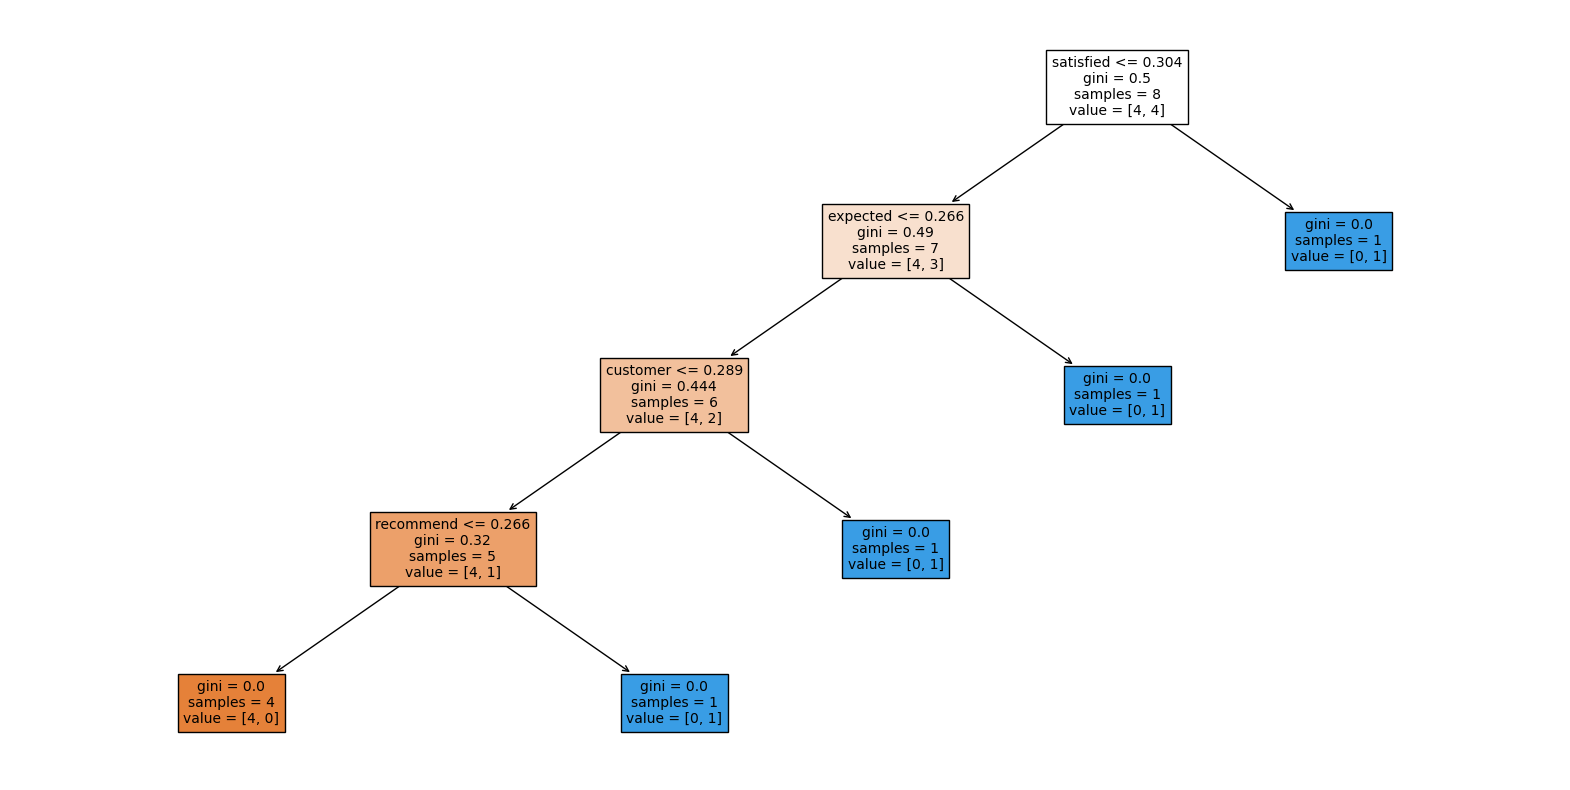

In [20]:
# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_classifier, filled=True, fontsize=10, feature_names=tfidf.get_feature_names_out())
plt.show()


In [21]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test_tfidf)

# Evaluate the Random Forest model
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [22]:
import joblib

In [25]:
# Step 6: Save the trained model and the TF-IDF vectorizer
joblib.dump(dt_classifier, 'sentiment_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!
